In [21]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import seaborn as sns

In [8]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

test_dataset = datasets.ImageFolder(root="../data/test", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
model = models.alexnet(pretrained=False)
model.classifier[6] = nn.Linear(in_features=4096, out_features=2)

model.load_state_dict(torch.load("../model/model.pth", map_location='cpu'))
model.eval()

In [12]:
all_preds = []
all_labels = []

In [ ]:
with torch.no_grad():
    for images, labels in test_loader:
        print("Entered")
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

classes = test_loader.dataset.classes
pred_classes = [classes[p] for p in all_preds]

for i in range(10):
    print(f"Actual : {classes[all_labels[i]]}, Predicted: {pred_classes[i]}")

In [18]:
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.87%


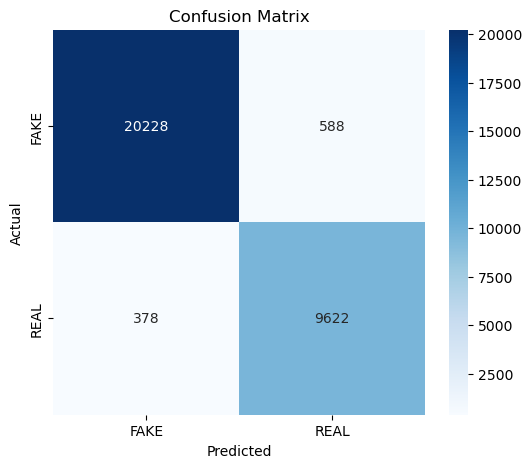

In [22]:
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()